In [1]:
import io
import sqlite3

import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image


def display_user_images(username: str):
    # Define the path to the database
    db_path = "../user/users.db"

    # Connect to the SQLite database
    conn = sqlite3.connect(db_path)

    # Load the user table into a pandas DataFrame
    USERS = pd.read_sql_query("SELECT * FROM user", conn)

    # Close the database connection
    conn.close()

    print(USERS["username"].head())
    # Filter the DataFrame for the specific user
    user_data = USERS[USERS["username"] == username]

    if user_data.empty:
        print("User not found.")
        return

    for n in [1, 2, 3]:
        image_column = f"image_{n}"
        if (
            image_column in user_data.columns
            and user_data.iloc[0][image_column] is not None
        ):
            # Convert binary data to an image
            image_bytes = io.BytesIO(user_data.iloc[0][image_column])
            image = Image.open(image_bytes)

            # Display the image
            plt.imshow(image)
            plt.axis("off")  # Turn off axis numbers
            plt.title(f"Image {n}")
            plt.show()
        else:
            print(f"No image data available for Image {n}.")

0     admin
1    armaan
2      adam
Name: username, dtype: object


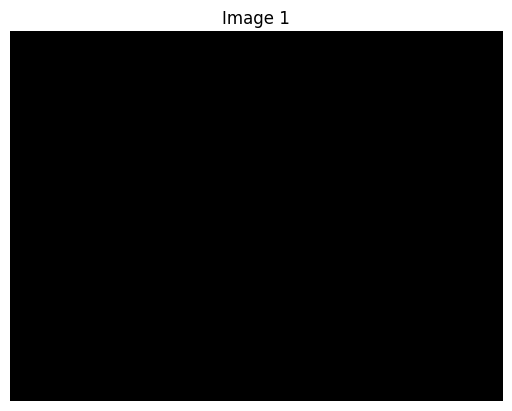

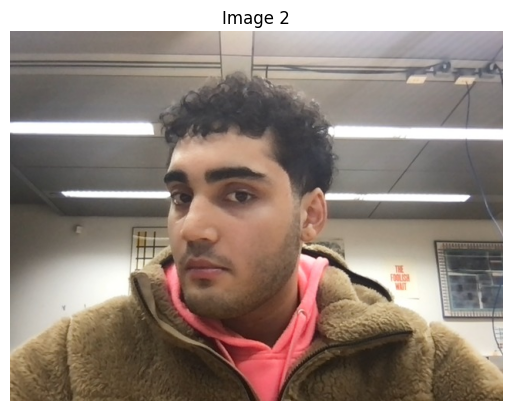

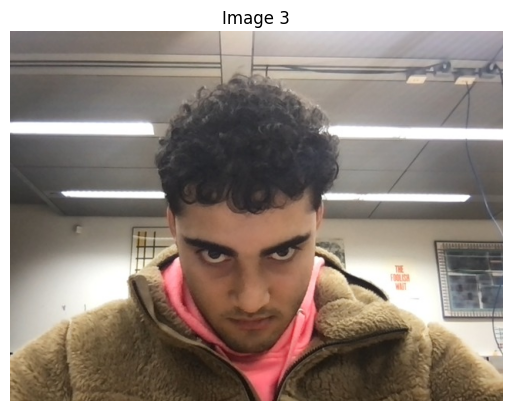

In [2]:
display_user_images("armaan")